In [ ]:
from google.colab import files
upload=files.upload()

Saving haberman.csv to haberman.csv


In [ ]:
import pandas as pd

In [ ]:
a=pd.read_csv('haberman.csv')

In [ ]:
a.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [ ]:
a.columns=['Age of patient','Patient year of operation (year - 1900)','No of positive axillary nodes detected','Survival status']

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
a.head(10)

,Age of patient,Patient year of operation (year - 1900),No of positive axillary nodes detected,Survival status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
5,33,60,0,1
6,34,59,0,2
7,34,66,9,2
8,34,58,30,1
9,34,60,1,1


In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


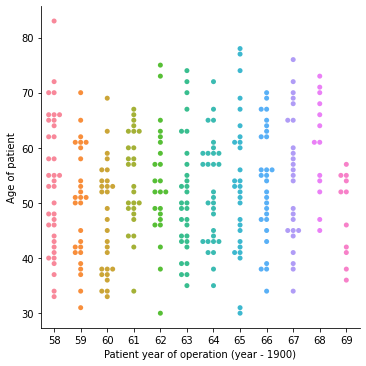

In [ ]:
sns.catplot(x='Patient year of operation (year - 1900)',y='Age of patient',kind='swarm',data=a)

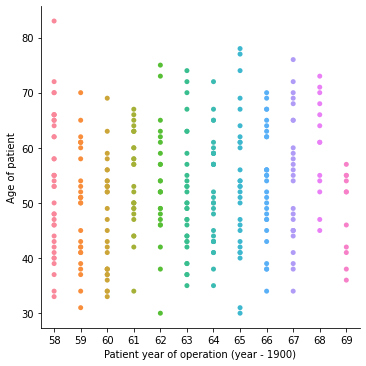

In [ ]:
sns.catplot(x='Patient year of operation (year - 1900)',y='Age of patient',jitter=False,data=a)

In [ ]:
#In the above plots we can see from the year 1967 the number of cancer patients gradually got reduced. And most of the patients were aged between 45 to 65.

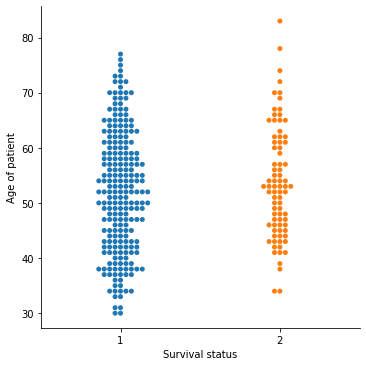

In [ ]:
sns.catplot(x='Survival status',y='Age of patient',kind='swarm',data=a)

In [ ]:
# In this plot we can see the survival rate of patients more than five years were higher.
#1 = The patient survived 5 years or longer.
#2 = The patient died within 5 year.

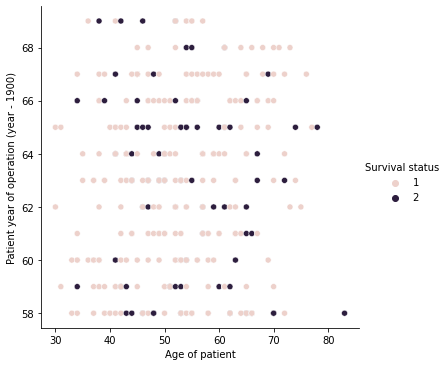

In [ ]:
sns.relplot(x='Age of patient',y='Patient year of operation (year - 1900)',hue='Survival status',data=a)

In [ ]:
# Here we can clearly see the survival status of patients year and age wise.
#1 = The patient survived 5 years or longer.
#2 = The patient died within 5 year.

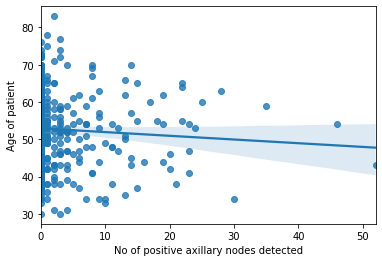

In [ ]:
sns.regplot(y='Age of patient',x='No of positive axillary nodes detected',data=a)

In [ ]:
#In this plot we can see that the number of axillary nodes detected for the patients were mostly less.
#In some cases only we have detected higher nodes.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 46.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


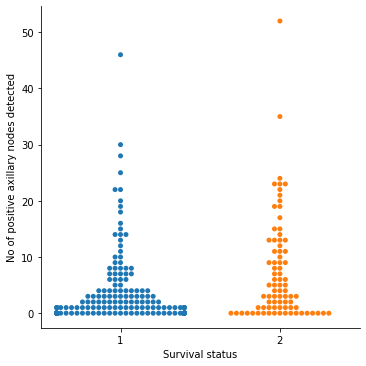

In [ ]:
sns.catplot(x='Survival status',y='No of positive axillary nodes detected',kind='swarm',data=a)

In [ ]:
# In this plot we can clearly see that the patients with higher positive axillary nodes were also survived more than 5 years.

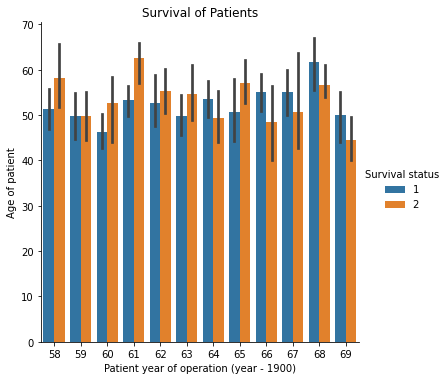

In [ ]:
b=sns.catplot(x='Patient year of operation (year - 1900)',y='Age of patient',kind='bar',hue='Survival status',data=a)
b.set(title='Survival of Patients')

In [ ]:
#Conclusion
From the above plot we can see that the survival rate of the patients were increasing from the year 1966 in 
the University of Chicago's Billings Hospital.Also from 1958 to 1965 the survival rate is almlost in equal ratio.

In [ ]:
a['Survival status']=a['Survival status'].replace(to_replace=2,value=0)

In [ ]:
a

,Age of patient,Patient year of operation (year - 1900),No of positive axillary nodes detected,Survival status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,0


In [ ]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   Age of patient                           305 non-null    int64
 1   Patient year of operation (year - 1900)  305 non-null    int64
 2   No of positive axillary nodes detected   305 non-null    int64
 3   Survival status                          305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [ ]:
x=a.iloc[:,0:3].values
y=a.iloc[:,3].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)
KNeighborsClassifier()
y_pred=classifier.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

confusion_matrix(y_test,y_pred)

array([[ 3, 14],
       [ 8, 36]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.27      0.18      0.21        17
           1       0.72      0.82      0.77        44

    accuracy                           0.64        61
   macro avg       0.50      0.50      0.49        61
weighted avg       0.60      0.64      0.61        61



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_train,y_train)
KNeighborsClassifier()
y_pred=classifier.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.18      0.18      0.18        17
           1       0.68      0.68      0.68        44

    accuracy                           0.54        61
   macro avg       0.43      0.43      0.43        61
weighted avg       0.54      0.54      0.54        61



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
kfold=model_selection.KFold(n_splits=10,random_state=7)
model=LogisticRegression()
results=model_selection.cross_val_score(model,x,y,cv=kfold)
print(results.mean(),results.std())

0.7406451612903225 0.08563596397436077


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
loocv=model_selection.LeaveOneOut()
model=LogisticRegression()
results=model_selection.cross_val_score(model,x,y,cv=loocv)
print(results.mean(),results.std())

0.740983606557377 0.43809462604624505


In [ ]:
kfold=model_selection.ShuffleSplit(n_splits=3,test_size=0.33,random_state=7)
model=LogisticRegression()
results=model_selection.cross_val_score(model,x,y,cv=kfold)
print(results.mean(),results.std())

0.7392739273927393 0.01682844723958016


In [ ]:
a.shape

(305, 4)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
cv=model_selection.RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=7)
results=model_selection.cross_val_score(model,x,y,cv=cv)
print(results.mean(),results.std())

0.7433333333333335 0.04346813260808208


Conclusion: After performing the regression we've performed the hypertuning to get more accuracy. Now we can choose the method which has more accuracy. Here Kfold algorithm has given more accuracy.